< 기출문제 - 2유형 >
- 2유형은 모델링
- 아묻따 랜포
- 분류 / 회귀

## 기출문제 - 2023.06
학생들의 데이터로 학생 구분하는 모델 만들어서 test에 적용하여, 얻은 구분을 csv형태로 생성
- 구분 : object -> 랜포는 labelencoding 안해줘도 됨
- RandomForestClassification


### 1. 패키지 import

In [1]:
import pandas as pd
import numpy as np
import sklearn

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# data split
from sklearn.model_selection import train_test_split

### 2.데이터 불러 + EDA
- 시험에서는 dataset이 train/test 분리되어있음 -> 분석 합쳐서 진행해야 함
- 읽고 내보내는 코드


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/data_6_2_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/data_6_2_test.csv')

In [3]:
df_train.head()

,일평균수면시간,일평균학습시간,일평균스마트폰사용시간,키,몸무게,체격,기초대사량,거주지역,구분
0,7.35,7.74,4.8,Tall,52.050,L,1499.4,동구,고등학생
1,7.05,8.10,1.2,Tall,51.300,M,1624.4,서구,중학생
2,7.35,7.74,3.0,Tall,51.285,L,1499.4,동구,고등학생
3,8.58,6.66,4.8,Short,25.545,XS,1249.5,서구,초등학생
4,7.05,8.10,4.8,Tall,54.150,M,1624.4,서구,대학생


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일평균수면시간      530 non-null    float64
 1   일평균학습시간      530 non-null    float64
 2   일평균스마트폰사용시간  530 non-null    float64
 3   키            530 non-null    object 
 4   몸무게          530 non-null    float64
 5   체격           530 non-null    object 
 6   기초대사량        530 non-null    float64
 7   거주지역         530 non-null    object 
 8   구분           530 non-null    object 
dtypes: float64(5), object(4)
memory usage: 37.4+ KB


In [5]:
df_train.describe(include = "object") ## include = "object"

,키,체격,거주지역,구분
count,530,530,530,530
unique,2,4,4,5
top,Tall,XS,남구,유치원생
freq,277,253,145,140


In [6]:
# 학생 구분 확인
df_train['구분'].value_counts()

,count
구분,
유치원생,140
초등학생,121
고등학생,120
대학생,78
중학생,71


In [7]:
# 결측치 확인
df_train.isna().sum()

,0
일평균수면시간,0
일평균학습시간,0
일평균스마트폰사용시간,0
키,0
몸무게,0
체격,0
기초대사량,0
거주지역,0
구분,0


In [8]:
df_test.head()

,일평균수면시간,일평균학습시간,일평균스마트폰사용시간,키,몸무게,체격,기초대사량,거주지역
0,7.97,7.11,1.2,Tall,51.375,L,1749.3,북구
1,9.80,5.76,1.2,Short,28.710,XS,1749.3,북구
2,7.66,7.38,1.2,Tall,36.915,L,1624.4,남구
3,9.50,5.94,3.0,Short,24.045,XS,1624.4,동구
4,6.44,8.82,3.0,Tall,45.180,S,1499.4,서구


In [9]:
# 결측치 확인
df_test.isna().sum() ## train/test -> 결측치 없음

,0
일평균수면시간,0
일평균학습시간,0
일평균스마트폰사용시간,0
키,0
몸무게,0
체격,0
기초대사량,0
거주지역,0


### 3.데이터 전처리
- 결측치 없음
- '구분' 변수 인코딩 필요
- '키', '체격', '거주지역' 변수 인코딩 필요

In [10]:
# train set에 대해서 모델링 -> df_train
df = df_train.copy()
X = df.drop('구분', axis = 1)
y = df['구분']

In [11]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit_transform(df['구분'])

In [12]:
# one-hot-encoding, T/F로 나오면 astype
X = pd.get_dummies(X).astype(int)
df_test = pd.get_dummies(df_test).astype(int)

In [13]:
print(X.shape)
print(df_test.shape)

(530, 15)
(230, 15)


In [14]:
X.head()

,일평균수면시간,일평균학습시간,일평균스마트폰사용시간,몸무게,기초대사량,키_Short,키_Tall,체격_L,체격_M,체격_S,체격_XS,거주지역_남구,거주지역_동구,거주지역_북구,거주지역_서구
0,7,7,4,52,1499,0,1,1,0,0,0,0,1,0,0
1,7,8,1,51,1624,0,1,0,1,0,0,0,0,0,1
2,7,7,3,51,1499,0,1,1,0,0,0,0,1,0,0
3,8,6,4,25,1249,1,0,0,0,0,1,0,0,0,1
4,7,8,4,54,1624,0,1,0,1,0,0,0,0,0,1


### 4.모델 분류 및 적합

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)

(424, 15)


In [16]:
# randomforestclassifer
rfc = RandomForestClassifier(n_estimators=300, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [17]:
# predict
pred = rfc.predict(X_test)
print(pred)

['고등학생' '대학생' '고등학생' '유치원생' '중학생' '유치원생' '초등학생' '고등학생' '초등학생' '유치원생'
 '유치원생' '고등학생' '유치원생' '초등학생' '대학생' '유치원생' '고등학생' '유치원생' '대학생' '유치원생'
 '초등학생' '초등학생' '중학생' '유치원생' '고등학생' '중학생' '유치원생' '유치원생' '고등학생' '유치원생'
 '유치원생' '유치원생' '초등학생' '고등학생' '유치원생' '초등학생' '고등학생' '고등학생' '유치원생' '고등학생'
 '고등학생' '초등학생' '중학생' '유치원생' '고등학생' '대학생' '고등학생' '초등학생' '고등학생' '중학생' '초등학생'
 '고등학생' '유치원생' '중학생' '유치원생' '대학생' '대학생' '유치원생' '대학생' '고등학생' '중학생' '중학생'
 '대학생' '고등학생' '중학생' '대학생' '대학생' '중학생' '유치원생' '중학생' '초등학생' '초등학생' '중학생'
 '초등학생' '유치원생' '유치원생' '초등학생' '유치원생' '고등학생' '유치원생' '대학생' '중학생' '고등학생' '대학생'
 '초등학생' '대학생' '유치원생' '초등학생' '고등학생' '중학생' '초등학생' '유치원생' '유치원생' '중학생' '고등학생'
 '초등학생' '초등학생' '유치원생' '중학생' '중학생' '고등학생' '고등학생' '초등학생' '고등학생' '중학생' '유치원생']


### 5.성능평가
- 랜포 성능 분류 : 정확도, 혼동행렬, report

In [18]:
from sklearn.metrics import accuracy_score, classification_report
acc = accuracy_score(y_test, pred)
print(acc)

rpt = classification_report(y_test, pred)
print(rpt)

0.8962264150943396
              precision    recall  f1-score   support

        고등학생       0.88      0.85      0.86        26
         대학생       0.85      0.92      0.88        12
        유치원생       0.97      0.97      0.97        30
         중학생       0.78      0.88      0.82        16
        초등학생       0.95      0.86      0.90        22

    accuracy                           0.90       106
   macro avg       0.88      0.89      0.89       106
weighted avg       0.90      0.90      0.90       106



### 6.test데이터에 대해서 분류 및 내보내기

In [19]:
pred_test = rfc.predict(df_test)
# print(pred_test)

In [20]:
# to.csv
res = pd.DataFrame(pred_test, columns=['구분예측'])
res.to_csv("result.csv", index=False)

In [21]:
res

,구분예측
0,고등학생
1,초등학생
2,중학생
3,유치원생
4,고등학생
...,...
225,초등학생
226,초등학생
227,고등학생
228,고등학생


## 기출문제 - 2022.12
- 중고차 판매 가격 예측
- randomforestregression


### 1.패키지 import

In [22]:
import pandas as pd
import numpy as np
import sklearn

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# data split
from sklearn.model_selection import train_test_split

# 성능 확인
from sklearn.metrics import mean_squared_error

### 2.데이터 불러오기 + EDA

In [71]:
df_y = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_y_train.csv')
df_X = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_X_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_X_test.csv')

In [72]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      7468 non-null   int64
 1   price   7468 non-null   int64
dtypes: int64(2)
memory usage: 116.8 KB


In [25]:
df_y.head()

,id,price
0,1,21350
1,2,69691
2,3,42950
3,4,31470
4,5,27495


In [26]:
df_X.info()
# object 변수에 대해서 원핫인코딩 수행
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7468 non-null   int64  
 1   model         7468 non-null   object 
 2   year          7468 non-null   int64  
 3   transmission  7468 non-null   object 
 4   mileage       7468 non-null   int64  
 5   fuelType      7468 non-null   object 
 6   tax           7468 non-null   int64  
 7   mpg           7468 non-null   float64
 8   engineSize    7468 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 525.2+ KB


In [27]:
df_X.head()

,id,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,A1,2019,Automatic,3500,Petrol,145,40.9,2.0
1,2,RS4,2020,Semi-Auto,2500,Petrol,145,28.8,2.9
2,3,A8,2019,Semi-Auto,500,Diesel,145,40.4,3.0
3,4,Q5,2019,Semi-Auto,5089,Diesel,150,38.2,2.0
4,5,A5,2020,Semi-Auto,4951,Diesel,145,51.4,2.0


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3200 non-null   int64  
 1   model         3200 non-null   object 
 2   year          3200 non-null   int64  
 3   transmission  3200 non-null   object 
 4   mileage       3200 non-null   int64  
 5   fuelType      3200 non-null   object 
 6   tax           3200 non-null   int64  
 7   mpg           3200 non-null   float64
 8   engineSize    3200 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 225.1+ KB


In [29]:
df_test.head()

,id,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,7469,A4,2020,Semi-Auto,4000,Diesel,145,54.3,3.0
1,7470,A6,2016,Manual,31300,Diesel,30,61.4,2.0
2,7471,Q5,2019,Semi-Auto,11296,Diesel,150,38.2,2.0
3,7472,A1,2018,Manual,6500,Petrol,145,55.4,1.4
4,7473,A3,2016,Manual,31524,Petrol,30,60.1,1.4


### 3.데이터 전처리
- object 변수에 대해서 원핫인코딩 수행
- 결측치 없어서 드랍할거 없음
- df_X와 df_test의 변수 일치하지 않는 문제 발생 -> test 기준으로 맞춤

In [73]:
# 원핫인코딩시 X와 test에 대해서도 다 해줘야 함
df_X = pd.get_dummies(df_X).astype(int)
df_test = pd.get_dummies(df_test).astype(int)

In [74]:
# df_X.head()
# df_test.head()

### 4 모델 분류 및 적합
- 이미 독립변수와 종속변수는 분리되어있음

In [75]:
X = df_X.drop(df_X[["model_ A2", "model_ RS7", "model_ S5", "model_ S8",]], axis = 1)
y = df_y['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)

(5974, 34)


In [76]:
# model fitting
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# prediction
pred = rfr.predict(X_test)
print(pred)

[27158.52 10435.7  21067.03 ... 31048.58 11815.04 58710.45]


### 5.성능평가

In [78]:
mse = mean_squared_error(y_test, pred)
print(mse)

7452201.880571889


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)
print(r2)

0.9414404050115821


In [82]:
# train set에 대해서도 성능 평가 -> 과적합 여부 확인
pred_train = rfr.predict(X_train)
# print(X_train)

print("mse : ", mean_squared_error(y_train, pred_train))
print("r^2: ", r2_score(y_train, pred_train))

mse :  878375.6315906427
r^2:  0.9935027516277957


### 5-1. Overfitting!!
- 원-핫 인코딩으로 인한 과적합인가
- 모델 파라미터 조정


In [96]:
# model fitting2
rfr2 = RandomForestRegressor(max_depth = 3, n_estimators=300, random_state = 42)
rfr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=300, random_state=42)

In [97]:
# pred_rfr2
pred_2 = rfr2.predict(X_test)
# print(X_test)

print("mse : ", mean_squared_error(y_test, pred_2))
print("r2 : ", r2_score(y_test, pred_2))


mse :  32909159.483868305
r2 :  0.7413989742


In [98]:
# pred_rfr2 - train
pred_3 = rfr2.predict(X_train)
# print(X_trian)

print("mse : ", mean_squared_error(y_train, pred_3))
print("r2 : ", r2_score(y_train, pred_3))


mse :  33788791.97615212
r2 :  0.750068005338159


### 6.test 데이터 예측

In [37]:
# predict
pred_test = rfr.predict(df_test)
print(pred_test)

[32014.91 16411.22 35215.9  ... 18641.92 24521.99 18071.34]


In [38]:
# to.csv
res = pd.DataFrame(pred_test, columns=['ID.Price'])
res.to_csv("result.csv", index=False)

In [39]:
print(res)

      ID.Price
0     32014.91
1     16411.22
2     35215.90
3     15772.76
4     16322.58
...        ...
3195  17826.17
3196  12120.46
3197  18641.92
3198  24521.99
3199  18071.34

[3200 rows x 1 columns]


### 6-1 rfr2로 test 데이터셋 예측

In [99]:
pred_test2 = rfr2.predict(df_test)
print(pred_test2)

[28732.94662258 13656.37118209 34977.28405401 ... 14453.5371258
 21862.64773758 14453.5371258 ]


In [101]:
# to.csv
res2 = pd.DataFrame(pred_test2, columns = ['ID.price'])
res2.to_csv("result2.csv", index = False)

res_read = pd.read_csv("result2.csv")

### 7.Feature Importance


In [104]:
# 중요도 추출
importances = rfr2.feature_importances_

# 변수명과 함께 DataFrame으로 정리
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# 중요도 순으로 정렬
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

print(feat_imp)

                   feature  importance
4                      mpg    0.561390
1                     year    0.225443
5               engineSize    0.121765
18               model_ R8    0.040826
29     transmission_Manual    0.031949
3                      tax    0.009438
2                  mileage    0.006240
33         fuelType_Petrol    0.001299
31         fuelType_Diesel    0.001293
0                       id    0.000187
10               model_ A6    0.000112
12               model_ A8    0.000051
30  transmission_Semi-Auto    0.000004
28  transmission_Automatic    0.000003
9                model_ A5    0.000000
8                model_ A4    0.000000
6                model_ A1    0.000000
7                model_ A3    0.000000
17               model_ Q8    0.000000
16               model_ Q7    0.000000
15               model_ Q5    0.000000
14               model_ Q3    0.000000
13               model_ Q2    0.000000
11               model_ A7    0.000000
20              model_ RS

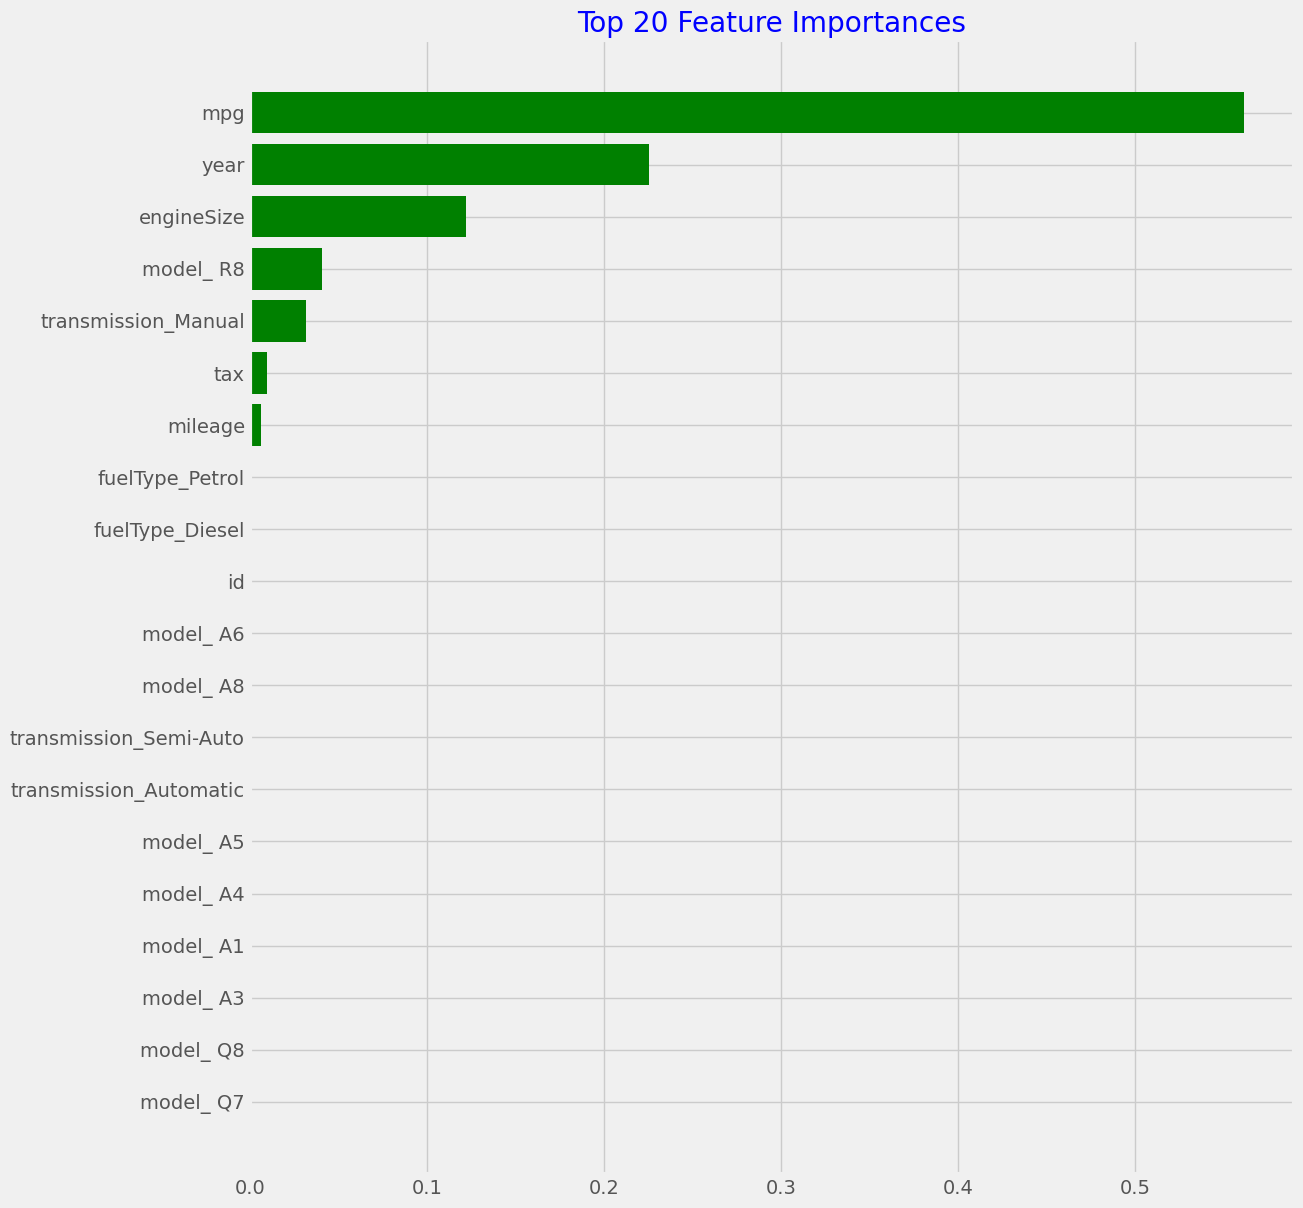

In [116]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') ## Solarize_Light2
plt.figure(figsize=(12, 14))
plt.barh(feat_imp['feature'].head(20), feat_imp['importance'].head(20), color = 'green')
plt.gca().invert_yaxis()  # 내림차순 정렬
plt.title("Top 20 Feature Importances", color = "blue")
plt.show()

## LabelEncoding으로 진행
- 성능 비교 목적
- 차원 수 증가 X

In [119]:
df_y = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_y_train.csv')
df_X = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_X_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/used_car_X_test.csv')

In [120]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7468 non-null   int64  
 1   model         7468 non-null   object 
 2   year          7468 non-null   int64  
 3   transmission  7468 non-null   object 
 4   mileage       7468 non-null   int64  
 5   fuelType      7468 non-null   object 
 6   tax           7468 non-null   int64  
 7   mpg           7468 non-null   float64
 8   engineSize    7468 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 525.2+ KB


In [121]:
df_X.head()

,id,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,A1,2019,Automatic,3500,Petrol,145,40.9,2.0
1,2,RS4,2020,Semi-Auto,2500,Petrol,145,28.8,2.9
2,3,A8,2019,Semi-Auto,500,Diesel,145,40.4,3.0
3,4,Q5,2019,Semi-Auto,5089,Diesel,150,38.2,2.0
4,5,A5,2020,Semi-Auto,4951,Diesel,145,51.4,2.0


In [122]:
# LabelEncoding - 한 컬럼당 하나씩 인코딩 해줘야 함
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_X['model'] = le.fit_transform(df_X['model'])
df_X['transmission'] = le.fit_transform(df_X['transmission'])
df_X['fuelType'] = le.fit_transform(df_X['fuelType'])

In [123]:
# test셋에 대해서도 인코딩 해줘야 함
df_test['model'] = le.fit_transform(df_test['model'])
df_test['transmission'] = le.fit_transform(df_test['transmission'])
df_test['fuelType'] = le.fit_transform(df_test['fuelType'])

In [124]:
from sklearn.model_selection import train_test_split

X = df_X
y = df_y['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [125]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 3, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [126]:
# predict
pred = rfr.predict(X_test)
print(pred)

[32822.82125697 13517.81576305 18969.07313396 ... 18570.48921332
 18709.33182735 13565.64074802]


In [127]:
# 성능 확인
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
print(mse)

r2 = r2_score(y_test, pred)
print(r2)

30718017.413883112
0.7573158627908618


In [128]:
# train set에 대해서도 예측하고 평가해보자
pred_train = rfr.predict(X_train)
print(pred_train)

# 성능 확인
mse = mean_squared_error(y_train, pred_train)
print(mse)

r2 = r2_score(y_train, pred_train)
print(r2)


[14678.12575536 17410.17922102 13517.81576305 ... 13517.81576305
 18570.48921332 29712.47888084]
31470332.88025074
0.7696772429260016


In [129]:
# 라벨링 후 변수 중요도 확인
# 중요도 추출
importances = rfr.feature_importances_

# 변수명과 함께 DataFrame으로 정리
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# 중요도 순으로 정렬
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

print(feat_imp)

        feature  importance
7           mpg    0.552287
2          year    0.232361
8    engineSize    0.151421
6           tax    0.036481
1         model    0.021260
4       mileage    0.006180
0            id    0.000010
3  transmission    0.000000
5      fuelType    0.000000
